In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [16]:
##Helper functions. Use when needed. 
def show_orignal_images(pixels):
	#Displaying Orignal Images
	fig, axes = plt.subplots(6, 10, figsize=(11, 7),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
	plt.show()

In [17]:
def show_eigenfaces(pca):
	#Displaying Eigenfaces
	fig, axes = plt.subplots(3, 8, figsize=(9, 4),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
	    ax.set_title("PC " + str(i+1))
	plt.show()

In [18]:
## Step 1: Read dataset and visualize it.
data=pd.read_csv(r"C:\Users\Sonu\Desktop\intern\madras\PCA\face_data.csv")
data




,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364,39
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587,39
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669422,0.673554,0.702479,...,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083,39
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306,39


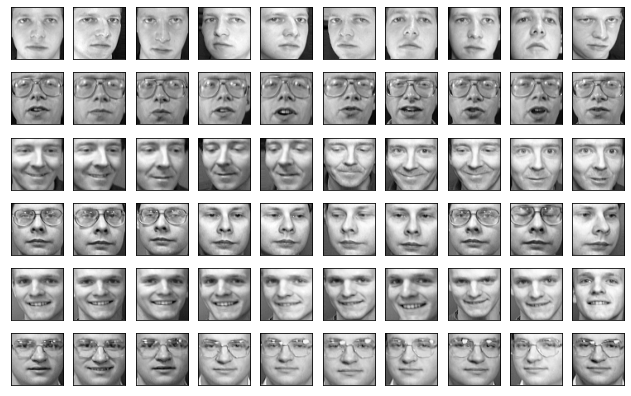

In [19]:
labels=data["target"]
pixels=data.drop(["target"],axis=1)
show_orignal_images(pixels)

In [20]:
## Step 2: Split Dataset into training and testing
x_train,x_test,y_train,y_test=train_test_split(pixels,labels)

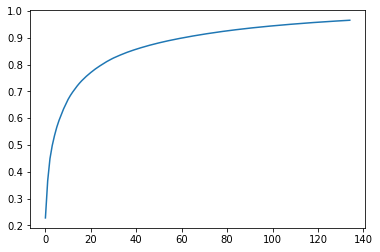

In [21]:
## Step 3: Perform PCA.
pca=PCA(n_components=135).fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

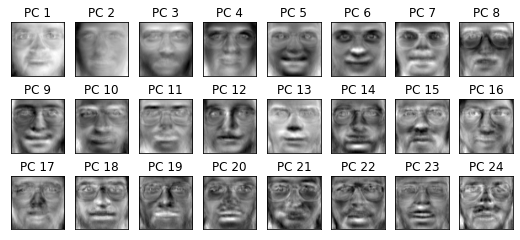

In [22]:
show_eigenfaces(pca)

In [23]:
## Step 4: Project Training data to PCA
x_train_pca=pca.transform(x_train)

In [24]:
## Step 5: Initialize Classifer and fit training data
clf=SVC(kernel='rbf',C=1000,gamma=0.01)
clf=clf.fit(x_train_pca,y_train)

In [25]:
## Step 6: Perform testing and get classification report
x_test_pca=pca.transform(x_test)
y_pred=clf.predict(x_test_pca)


In [26]:
print (classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2
           6       0.33      1.00      0.50         1
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         4
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         4
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          15       0.67      1.00      0.80         2
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         6
          18       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         3
          20       0.67    